# Modeling - Gradient Boost - no OHE

In [1]:
import pickle
import pandas as pd
import numpy as np
import yaml

In [2]:
try:
    with open("../config.yaml", 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading config file')

## Datetime info represented cyclically

In [3]:
data_cyc = pd.read_csv(config['data']['data_with_ids_cyc'])

In [4]:
data_cyc

,weekday,start_station_id,count,start_station_name,start_lat,start_lng,temperature_f,precipitation_in,windspeed_mph,special_event,week_number_sin,week_number_cos,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
0,4,4993.13,1,Old Slip & South St,40.703367,-74.007868,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,0.433884,0.000000,1.000000
1,4,5065.12,1,William St & Pine St,40.707179,-74.008873,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,0.433884,0.000000,1.000000
2,4,5114.06,1,West Thames St,40.708347,-74.017134,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,0.433884,0.000000,1.000000
3,4,5137.11,1,Fulton St & William St,40.709601,-74.006551,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,0.433884,0.000000,1.000000
4,4,5137.13,1,Spruce St & Gold St,40.710323,-74.004323,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,0.433884,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321124,5,5216.06,9,Vesey St & Church St,40.712455,-74.010822,68.8,0.0,4.7,0,-3.216245e-16,-1.0,1.224647e-16,-1.000000,-0.433884,-0.433884,-0.258819,0.965926
321125,5,5288.08,1,Park Pl & Church St,40.713089,-74.009329,68.8,0.0,4.7,0,-3.216245e-16,-1.0,1.224647e-16,-1.000000,-0.433884,-0.433884,-0.258819,0.965926
321126,5,5288.09,4,Warren St & W Broadway,40.714740,-74.009106,68.8,0.0,4.7,0,-3.216245e-16,-1.0,1.224647e-16,-1.000000,-0.433884,-0.433884,-0.258819,0.965926
321127,5,5288.12,1,Murray St & Greenwich St,40.714694,-74.011219,68.8,0.0,4.7,0,-3.216245e-16,-1.0,1.224647e-16,-1.000000,-0.433884,-0.433884,-0.258819,0.965926


### Define X and y

In [5]:
y = data_cyc['count'].copy()
X = data_cyc.drop(['count', 'start_station_name', 'start_lat', 'start_lng', 'weekday'], axis=1).copy()

### Train test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [7]:
X_train.columns

Index(['start_station_id', 'temperature_f', 'precipitation_in',
       'windspeed_mph', 'special_event', 'week_number_sin', 'week_number_cos',
       'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'hour_sin',
       'hour_cos'],
      dtype='object')

### Gradient Boost on cyclic dataset - no OHE

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [11]:
gbr.score(X_test, y_test)

0.7240300718832837

In [13]:
y_test_pred = gbr.predict(X_test)

In [14]:
y_train_pred = gbr.predict(X_train)

In [15]:
from functions import prep_for_eval, error_metrics_report, plot_real_predicted

In [16]:
error_metrics_report(y_train, y_test, y_train_pred, y_test_pred)

,Metric,Train,Test
0,MAE,2.40,2.42
1,MSE,11.01,11.37
2,RMSE,3.32,3.37
3,R2,0.73,0.72


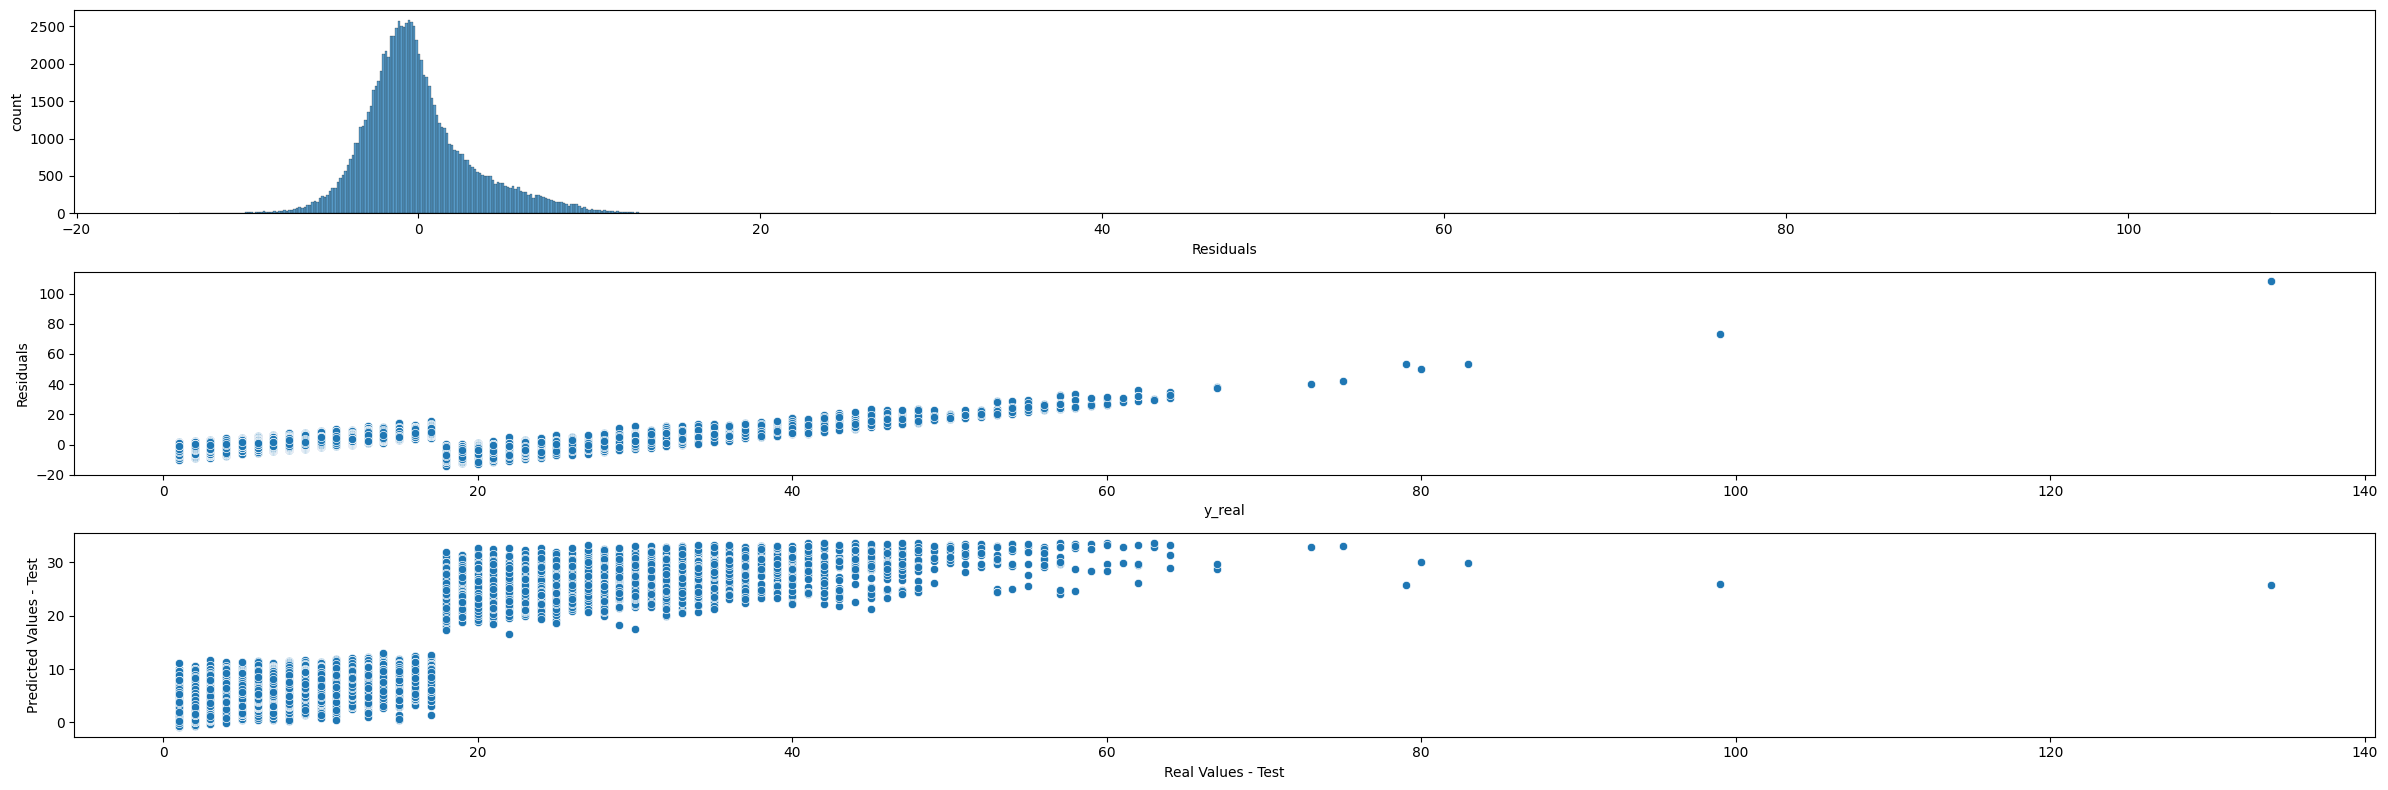

In [17]:
plot_real_predicted('test', y_test, y_test_pred)